In [1]:
suppressWarnings(suppressPackageStartupMessages({
  library(tidyverse)
    library(data.table)
    library(EvolutionaryGames)
    library(ggthemes)
    library(latex2exp)
    library(ggtext)
    library(progress)
    library(ggplot2) 
    library(gapminder)
}))
setwd("D:/social nerwork/1Replicator dynamics for involution in an infinite well-mixed population (2)")

In [2]:
duplicate_dynamic_xy<-function(y,x,M,beta1,beta2,d,N,c,l){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  
  # y 整体内卷比例
  # x 整体躺平比例
  
  # #内卷相对躺平的效用
  # beta1<-4
  # #合作相对躺平的效用
  # beta2<-2
  
  # #more effort的成本
  # d<-4
  # #less effort的成本
  # c<-1
  # #躺平的成本
  # l<-0.5
  #-----------------------#
  
  Pc<-0
  Pd<-0
  Pl<-0 
  for (Nd in 0:(N-1)){ 
    for (Nl in 0:(N-1-Nd)){
      Nc <- N-1-Nd-Nl
      pai_d <- beta1*d*M/(beta1*(Nd+1)*d +beta2*Nc*c     +Nl*l)-d 
      pai_c <- beta2*c*M/(beta1*Nd*d     +beta2*(Nc+1)*c +Nl*l)-c          
      pai_l <-       l*M/(beta1*Nd*d     +beta2*Nc*c     +(Nl+1)*l)-l  
      Pd <- Pd + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_d
      Pc <- Pc + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_c
      Pl <- Pl + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_l
    }
  }
  
  R_ <- y*Pd+x*Pl+(1-x-y)*Pc  ##均值
  y. <- y*(Pd-R_)
  x. <- x*(Pl-R_)
  
  result<-data.frame(y=y,x=x,M=M,beta1=beta1,beta2=beta2,d=d,N=N,c=c,l=l,y.=y.,x.=x.)
  return(result)
}

In [3]:
#----------------------------------------------#
#-----1.1当躺平人数一定时，内卷人数的稳定点----#
#----------------------------------------------#

#x+y<=1
data<-data.frame()
pb <- progress_bar$new(format = "  完成百分比 [:bar] :percent 执行时间 :elapsed:elapsedfull",total = 101, clear = FALSE, width= 60)
for(y in seq(0,1,0.01)){
  pb$tick()
  for(x in seq(0,1-y,0.01)){
    temp<-duplicate_dynamic_xy(y,x,M=100,beta1=4,beta2=2,d=4,N=50,c=1,l=0.5)
    data<-rbind(data,temp)
  }
}


data1<-data %>% 
  mutate(y=round(y,digits=2)) %>% #排序有问题，debug是浮点数的问题#第495行
  mutate(x=round(x,digits=2)) %>%
  arrange(x,y) %>% 
  data.table() %>% 
  .[,y1:=c(y.[-1],0),by=x] %>% 
  mutate(y0=y.*y1) %>% 
  data.table() %>% 
  .[,ystar:=y[y0<0]-0.005,by=x] %>% 
  mutate(ystar=ifelse(is.na(ystar),0,ystar)) %>% #好多NA的问题，是无0,要设置为o
  subset(!is.na(ystar))


  完成百分比 [>---------------------------]   2% 执行时间  1s00:00:00

  完成百分比 [>---------------------------]   3% 执行时间  1s00:00:01

  完成百分比 [>---------------------------]   4% 执行时间  2s00:00:01

  完成百分比 [>---------------------------]   5% 执行时间  2s00:00:02

  完成百分比 [=>--------------------------]   6% 执行时间  3s00:00:02

  完成百分比 [=>--------------------------]   7% 执行时间  3s00:00:03

  完成百分比 [=>--------------------------]   8% 执行时间  4s00:00:03

  完成百分比 [=>--------------------------]   9% 执行时间  4s00:00:04

  完成百分比 [==>-------------------------]  10% 执行时间  5s00:00:05

  完成百分比 [==>-------------------------]  11% 执行时间  6s00:00:05

  完成百分比 [==>-------------------------]  12% 执行时间  6s00:00:06

  完成百分比 [===>------------------------]  13% 执行时间  7s00:00:06

  完成百分比 [===>------------------------]  14% 执行时间  7s00:00:07

  完成百分比 [===>------------------------]  15% 执行时间  8s00:00:07

  完成百分比 [===>------------------------]  16% 执行时间  8s00:00:08

  完成百分比 [====>-----------------------]  17% 执行时间  9s00:00:08

  完成百分比

In [11]:
data
data1

y,x,M,beta1,beta2,d,N,c,l,y.,x.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.00,100,4,2,4,50,1,0.5,0,0.000000000
0,0.01,100,4,2,4,50,1,0.5,0,-0.009935102
0,0.02,100,4,2,4,50,1,0.5,0,-0.019891506
0,0.03,100,4,2,4,50,1,0.5,0,-0.029867392
0,0.04,100,4,2,4,50,1,0.5,0,-0.039860882
0,0.05,100,4,2,4,50,1,0.5,0,-0.049870040
0,0.06,100,4,2,4,50,1,0.5,0,-0.059892871
0,0.07,100,4,2,4,50,1,0.5,0,-0.069927316
0,0.08,100,4,2,4,50,1,0.5,0,-0.079971249


y,x,M,beta1,beta2,d,N,c,l,y.,x.,y1,y0,ystar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0,100,4,2,4,50,1,0.5,0.00000000,0,0.08347045,0.00000000,0.505
0.01,0,100,4,2,4,50,1,0.5,0.08347045,0,0.15443857,0.01289106,0.505
0.02,0,100,4,2,4,50,1,0.5,0.15443857,0,0.21457544,0.03313872,0.505
0.03,0,100,4,2,4,50,1,0.5,0.21457544,0,0.26530240,0.05692738,0.505
0.04,0,100,4,2,4,50,1,0.5,0.26530240,0,0.30783254,0.08166871,0.505
0.05,0,100,4,2,4,50,1,0.5,0.30783254,0,0.34320484,0.10564962,0.505
0.06,0,100,4,2,4,50,1,0.5,0.34320484,0,0.37231215,0.12777933,0.505
0.07,0,100,4,2,4,50,1,0.5,0.37231215,0,0.39592441,0.14740747,0.505
0.08,0,100,4,2,4,50,1,0.5,0.39592441,0,0.41470771,0.16419290,0.505


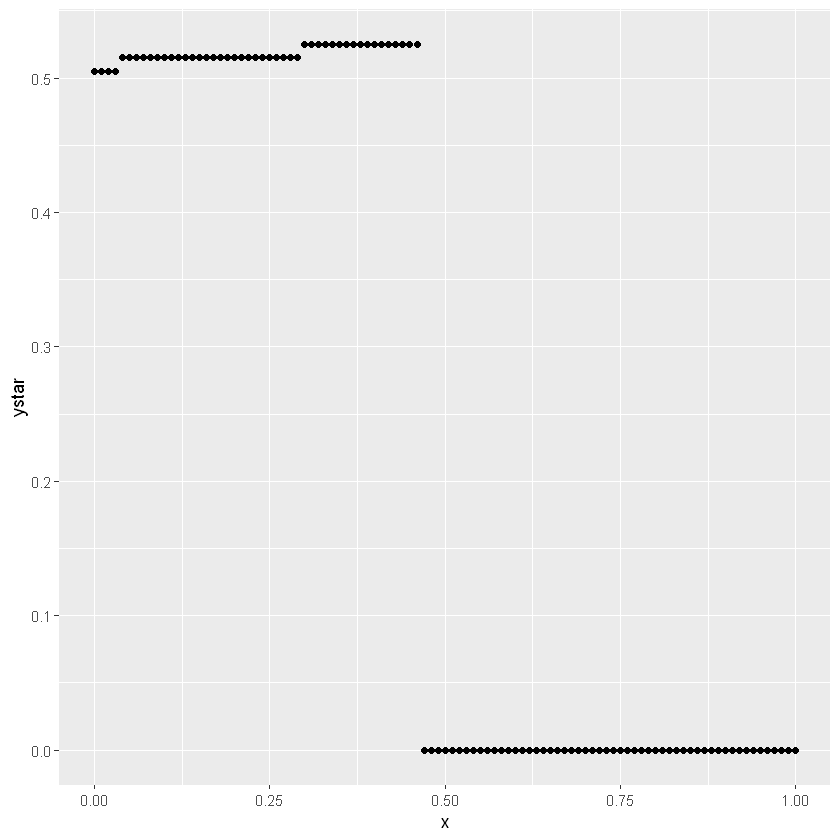

In [4]:
#ystar随x是如何变化的？
ggplot(data1,aes(x=x,y=ystar))+
  geom_point()

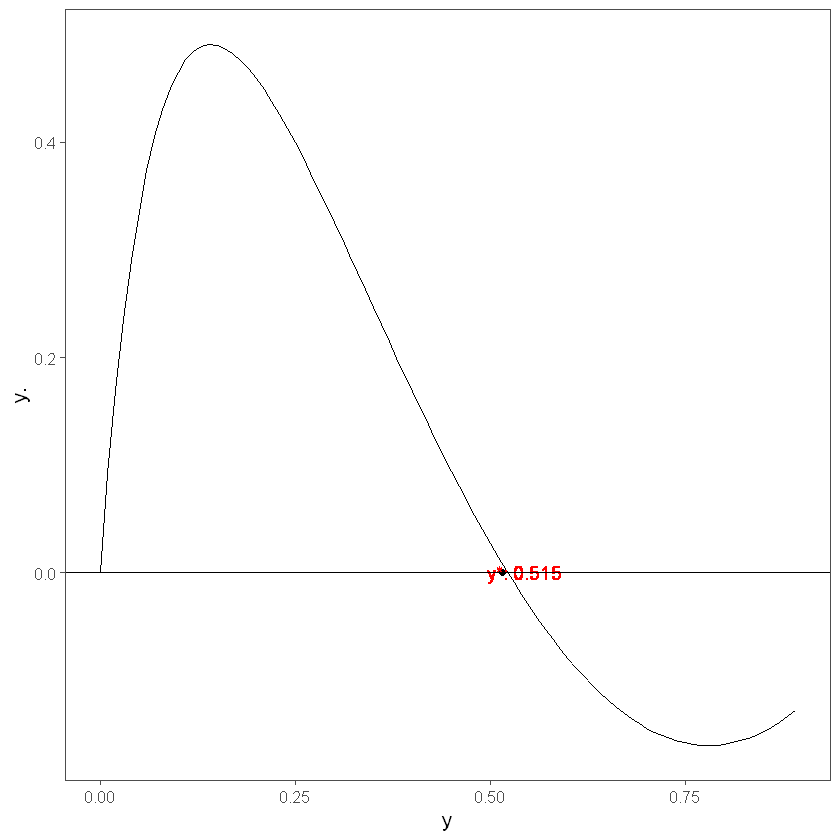

In [7]:
#当x=0.1时
df<-data %>% 
  subset(x==0.1)%>% 
  mutate(y1=c(y.[-1],1)) %>% 
  mutate(y0=y*y1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

ystar<-ifelse(sum(df$y[df$y0<0])==0,0,df$y[df$y0<0]-0.005)

ggplot(df,aes(x=y,y=y.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=ystar,y=0))+
  geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "y", y = "y.")

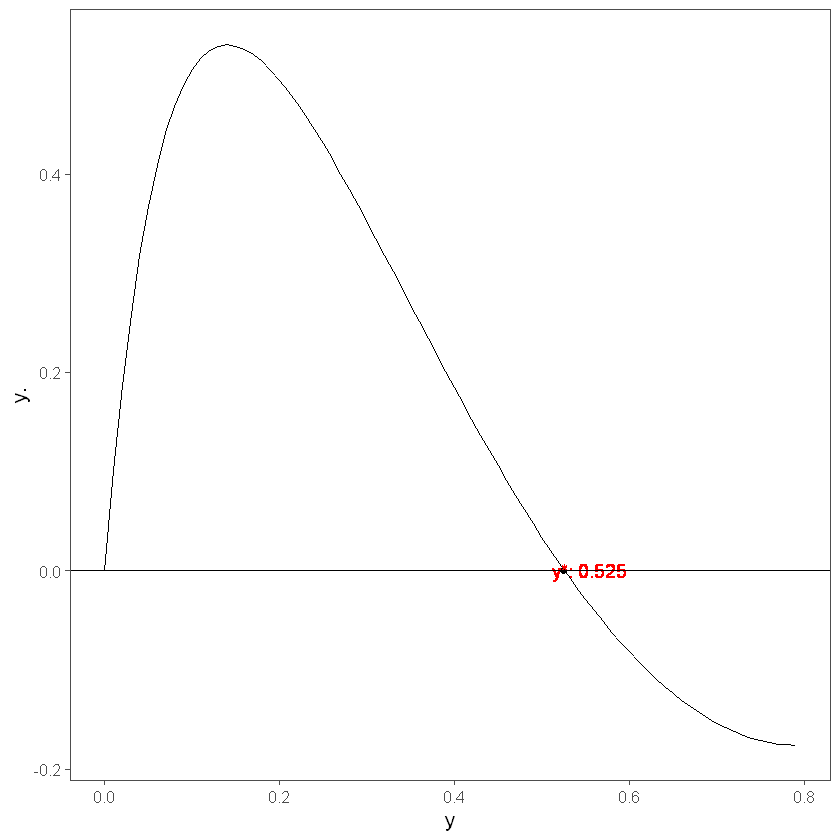

In [8]:
#当x=0.2时
df<-data %>% 
  subset(x==0.2)%>% 
  mutate(y1=c(y.[-1],1)) %>% 
  mutate(y0=y*y1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

ystar<-ifelse(sum(df$y[df$y0<0])==0,0,df$y[df$y0<0]+0.005)

ggplot(df,aes(x=y,y=y.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=ystar,y=0))+
  geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "y", y = "y.")

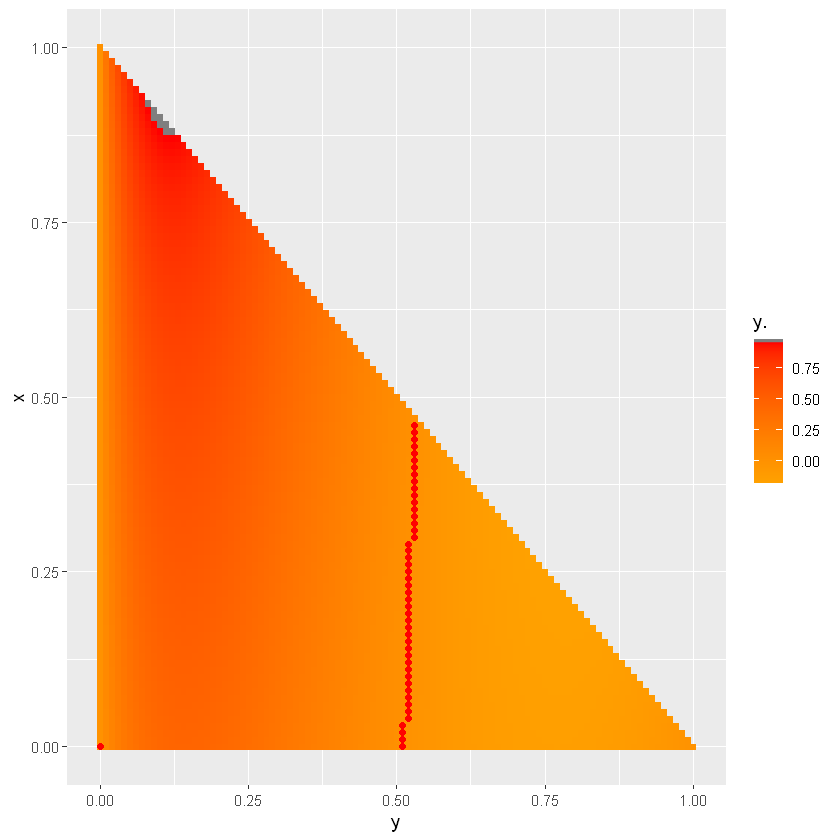

In [5]:
data2<-data1 %>% 
  subset(y0<0) %>% 
  dplyr::select(y,x)

data3<-data1 %>% 
  mutate(x2=c(data2$x,rep(0,nrow(data1)-nrow(data2)))) %>% 
  mutate(y2=c(data2$y,rep(0,nrow(data1)-nrow(data2))))

ggplot(data3,aes(x=y,y=x))+
  scale_fill_gradientn(values = c(min(data3$y.),0,max(data3$y.)),
                       colors = c('yellow','red'))+
  geom_raster(aes(fill=y.))+
  geom_point(aes(x=y2,y=x2),color="red")

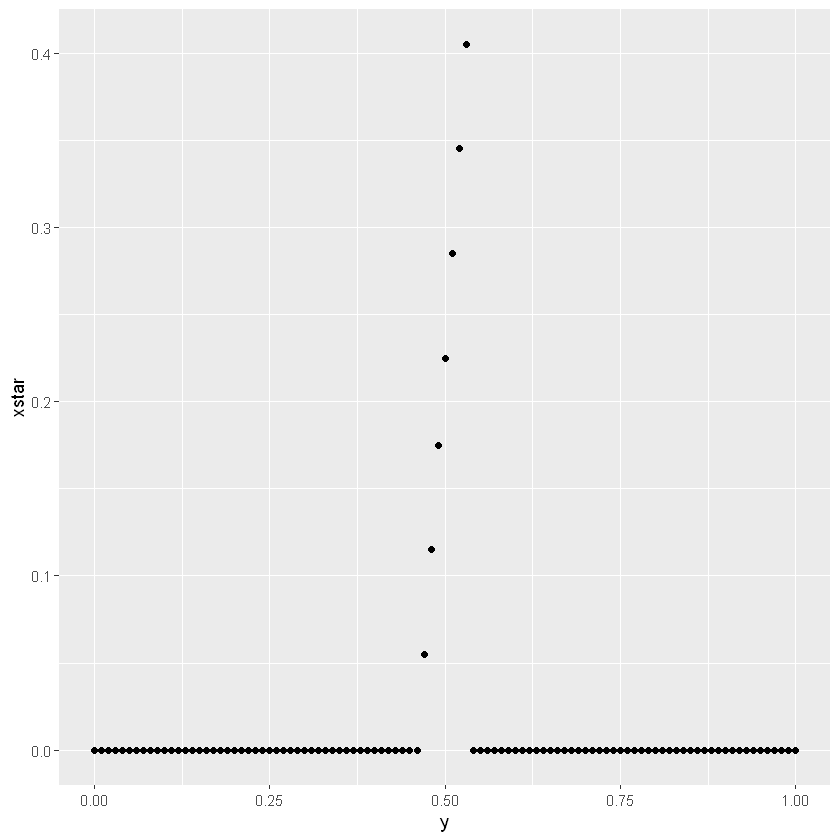

In [28]:
#----------------------------------------------#
#--------1.2内卷人数比例对躺平人数的影响-------#
#----------------------------------------------#

data4<-data %>% 
  mutate(y=round(y,digits=2)) %>% #排序有问题，debug是浮点数的问题#第495行 # 对y四舍五入
  mutate(x=round(x,digits=2)) %>%
  arrange(y,x) %>% 
  data.table() %>% 
  .[,x1:=c(x.[-1],0),by=y] %>% 
  mutate(x0=x.*x1) %>% 
  data.table()%>% 
  .[,xstar:=x[x0<0]-0.005,by=y] %>% 
  mutate(xstar=ifelse(is.na(xstar),0,xstar)) %>% #好多NA的问题，是无0,要设置为o
  subset(!is.na(xstar)) # 之前这里是ystar

#ystar随x是如何变化的？
ggplot(data4,aes(x=y,y=xstar))+
  geom_point()

#如何解释？

In [22]:
library(dplyr)
newdata <- subset(data4,x0<0)
newdata

y,x,M,beta1,beta2,d,N,c,l,y.,x.,x1,x0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.47,0.06,100,4,2,4,50,1,0.5,0.063119822,1.090779e-04,-2.066411e-04,-2.253997e-08
0.48,0.12,100,4,2,4,50,1,0.5,0.054755238,1.365731e-04,-4.724657e-04,-6.452611e-08
0.49,0.18,100,4,2,4,50,1,0.5,0.046083940,8.373333e-05,-8.188467e-04,-6.856476e-08
0.50,0.23,100,4,2,4,50,1,0.5,0.036322834,1.052770e-03,-4.821699e-05,-5.076142e-08
0.51,0.29,100,4,2,4,50,1,0.5,0.027070641,1.136879e-03,-2.580761e-04,-2.934013e-07
0.52,0.35,100,4,2,4,50,1,0.5,0.017526249,1.144463e-03,-5.446644e-04,-6.233484e-07
0.53,0.41,100,4,2,4,50,1,0.5,0.007694022,1.076676e-03,-9.068240e-04,-9.763556e-07


In [37]:
data5<-merge(data1,data4)
data5

y,x,M,beta1,beta2,d,N,c,l,y.,x.,y1,y0,ystar,x1,x0,xstar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.00,100,4,2,4,50,1,0.5,0,0.000000000,0.08347045,0,0.505,-0.009935102,0.0000000000,0
0,0.01,100,4,2,4,50,1,0.5,0,-0.009935102,0.08425687,0,0.505,-0.019891506,0.0001976241,0
0,0.02,100,4,2,4,50,1,0.5,0,-0.019891506,0.08505385,0,0.505,-0.029867392,0.0005941074,0
0,0.03,100,4,2,4,50,1,0.5,0,-0.029867392,0.08586159,0,0.505,-0.039860882,0.0011905406,0
0,0.04,100,4,2,4,50,1,0.5,0,-0.039860882,0.08668030,0,0.515,-0.049870040,0.0019878638,0
0,0.05,100,4,2,4,50,1,0.5,0,-0.049870040,0.08751020,0,0.515,-0.059892871,0.0029868599,0
0,0.06,100,4,2,4,50,1,0.5,0,-0.059892871,0.08835149,0,0.515,-0.069927316,0.0041881477,0
0,0.07,100,4,2,4,50,1,0.5,0,-0.069927316,0.08920440,0,0.515,-0.079971249,0.0055921748,0
0,0.08,100,4,2,4,50,1,0.5,0,-0.079971249,0.09006916,0,0.515,-0.090022477,0.0071992099,0


In [45]:
data55<-read.table('data5.csv',header = TRUE, sep = ",")
data55 # data55是我自己在excel操作的、，不会用R、、

y,x,M,beta1,beta2,d,N,c,l,type,value,y.,x.,y1,y0,ystar,x1,x0,xstar
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.00,100,4,2,4,50,1,0.5,ystar,0.505,0,0.000000000,0.08347045,0,0.505,-0.009935102,0.000000000,0
0,0.01,100,4,2,4,50,1,0.5,ystar,0.505,0,-0.009935102,0.08425687,0,0.505,-0.019891506,0.000197624,0
0,0.02,100,4,2,4,50,1,0.5,ystar,0.505,0,-0.019891506,0.08505385,0,0.505,-0.029867392,0.000594107,0
0,0.03,100,4,2,4,50,1,0.5,ystar,0.505,0,-0.029867392,0.08586159,0,0.505,-0.039860882,0.001190541,0
0,0.04,100,4,2,4,50,1,0.5,ystar,0.515,0,-0.039860882,0.08668030,0,0.515,-0.049870040,0.001987864,0
0,0.05,100,4,2,4,50,1,0.5,ystar,0.515,0,-0.049870040,0.08751020,0,0.515,-0.059892871,0.002986860,0
0,0.06,100,4,2,4,50,1,0.5,ystar,0.515,0,-0.059892871,0.08835149,0,0.515,-0.069927316,0.004188148,0
0,0.07,100,4,2,4,50,1,0.5,ystar,0.515,0,-0.069927316,0.08920440,0,0.515,-0.079971249,0.005592175,0
0,0.08,100,4,2,4,50,1,0.5,ystar,0.515,0,-0.079971249,0.09006916,0,0.515,-0.090022477,0.007199210,0


Warning message:
"Removed 2 rows containing missing values (geom_point)."


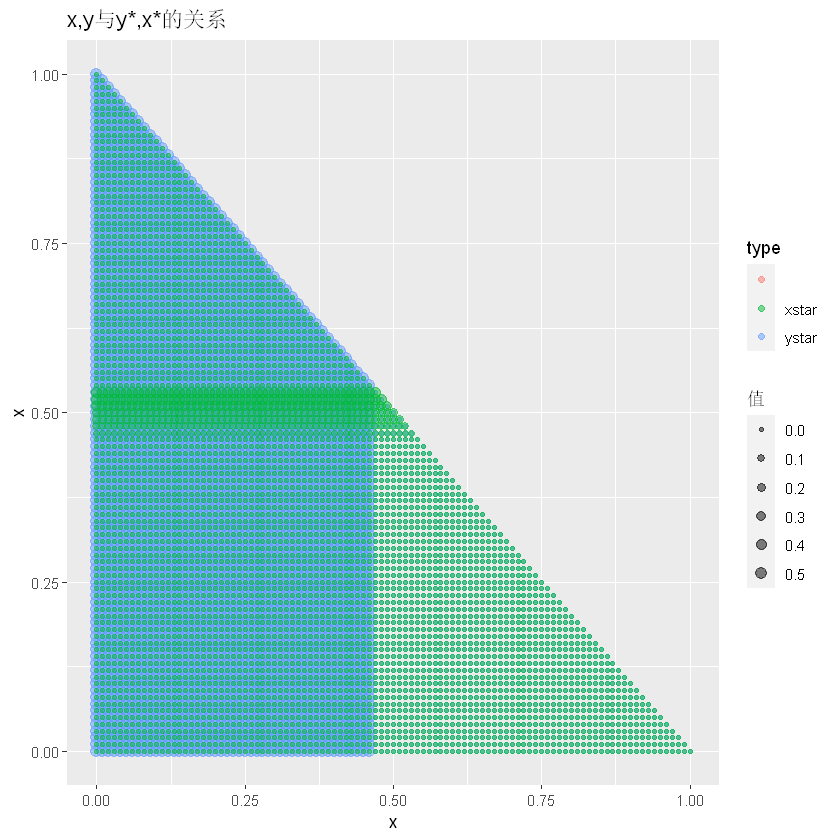

In [58]:
ggplot(data55, 
       aes(x = x,
           y = y,
           size = value, 
           color = type)) + 
  geom_point(alpha = .5) + 
# scale_size()函数通过range()函数设置气泡的最小到最大值范围   
  scale_size(range = c(1, 3)) + 
  labs(title = "x,y与y*,x*的关系", 
     x = "x", 
     y = "x", 
     size = "值") 


#双坐标 x左y右 ？
#facet切面
#

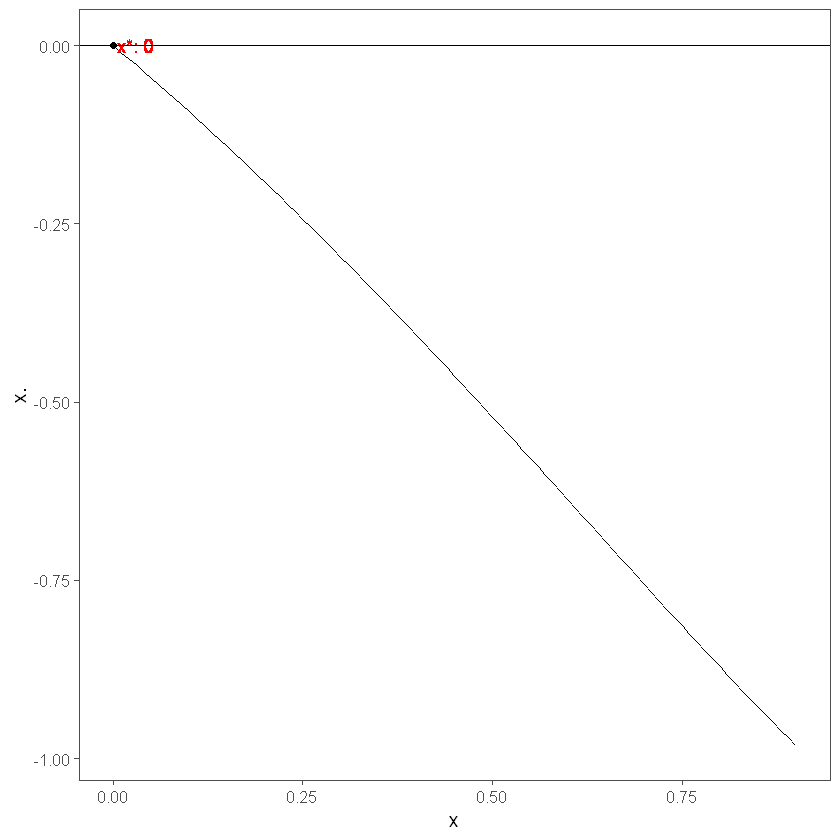

In [23]:
#当y=0.1时
df<-data %>% 
  subset(y==0.1)%>% 
  mutate(x1=c(x.[-1],0)) %>%                                                                          
  mutate(x0=x.*x1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

xstar<-ifelse(sum(df$x[df$x0<0])==0,0,df$x[df$x0<0]+0.005)

ggplot(df,aes(x=x,y=x.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=xstar,y=0))+
  geom_text(aes(x=xstar,y=0),label=paste("x*:",xstar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "x", y = "x.")

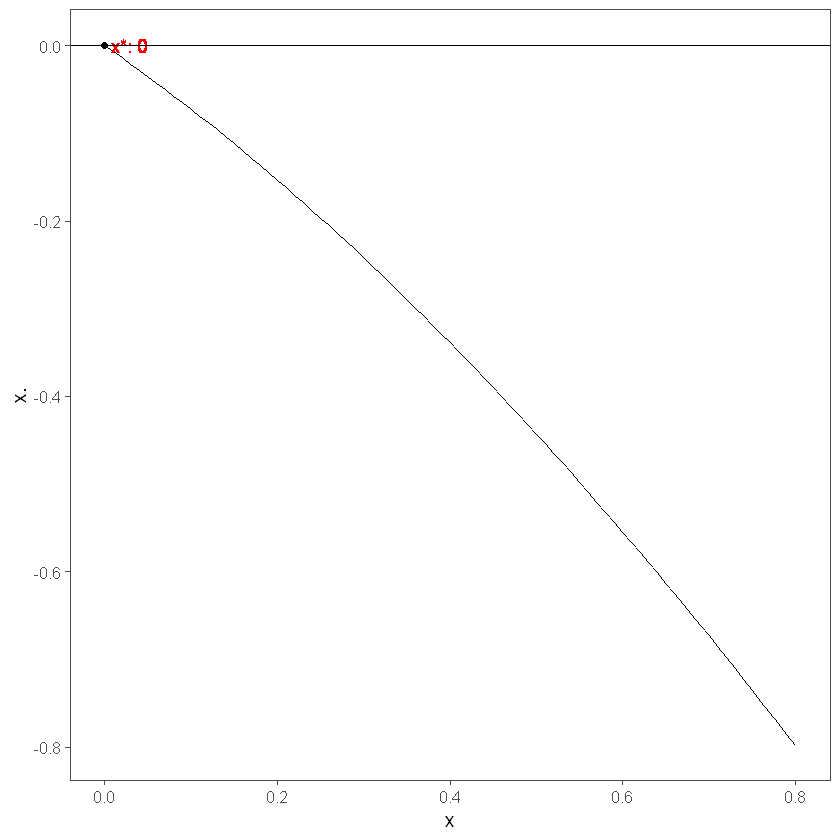

In [24]:
#当y=0.7时
df<-data %>% 
  subset(y==0.2)%>% 
  mutate(x1=c(x.[-1],0)) %>% 
  mutate(x0=x.*x1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

xstar<-ifelse(sum(df$x[df$x0<0])==0,0,df$x[df$x0<0]+0.005)

ggplot(df,aes(x=x,y=x.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=xstar,y=0))+
  geom_text(aes(x=xstar,y=0),label=paste("x*:",xstar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "x", y = "x.")

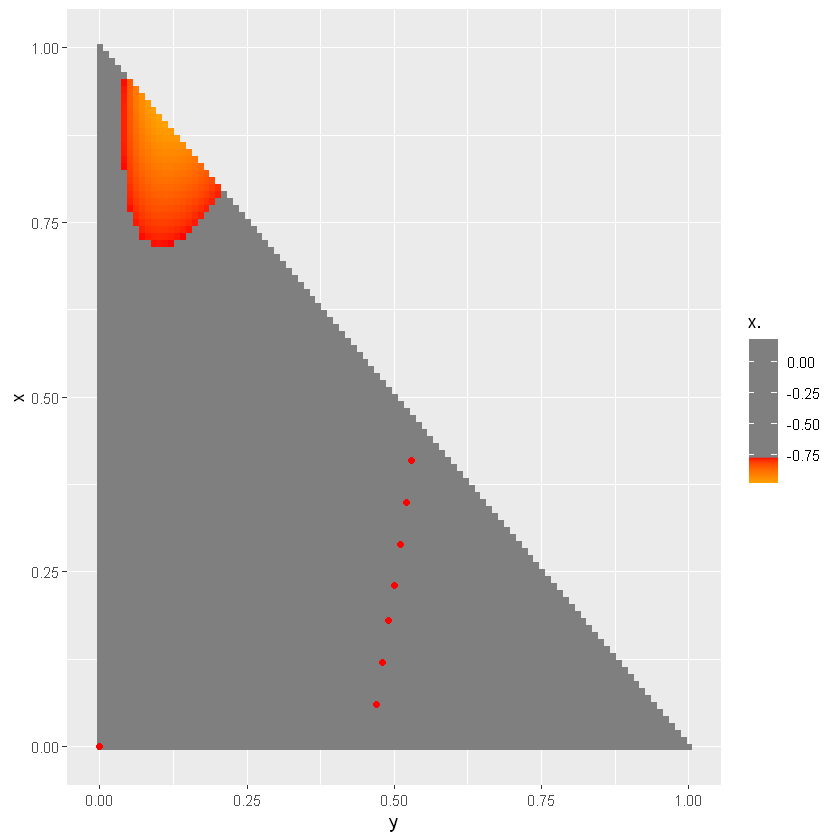

In [26]:
#x与y对xstar的影响？
#.x,y, fill=y.  然后把y.=0的点标记红色
data2<-data1 %>% 
  subset(x0<0) %>% 
  dplyr::select(y,x)

data3<-data1 %>% 
  mutate(x2=c(data2$x,rep(0,nrow(data1)-nrow(data2)))) %>% 
  mutate(y2=c(data2$y,rep(0,nrow(data1)-nrow(data2))))

ggplot(data3,aes(x=y,y=x))+
  scale_fill_gradientn(values = c(min(data3$x.),0,max(data3$x.)),
                       colors = c('yellow','red'))+
  geom_raster(aes(fill=x.))+
  geom_point(aes(x=y2,y=x2),color="red")

#大片异常点，什么原因？
#如何配色更适合凸显0的分界线？
#如何解释？